<a href="https://colab.research.google.com/github/Kridr/HW_MMDA_HSE/blob/main/Project_MMDA/Project_MMDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Source: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Initially we have some clinical records about different patients (for example: age, level of serum sodium and etc.) and corresponding binary target variable - death event (whether some patient died because of heart failure).

We want to predict target variable based on features


# Dataset summary with basic statistics and respective plots

Importing libraries

In [1]:
import pandas as pd
import numpy as np

from collections import *

import seaborn as sns
import matplotlib.pyplot as plt

Reading data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kridr/HW_MMDA_HSE/main/Project_MMDA/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Let's first explore out target variable

Counter({0: 203, 1: 96})


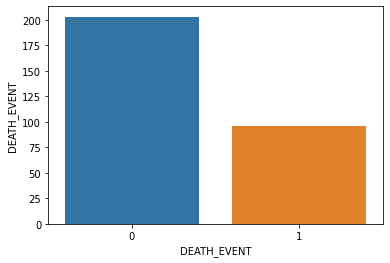

In [20]:
print(Counter(df['DEATH_EVENT']))
sns.barplot(data=df, x='DEATH_EVENT', y='DEATH_EVENT', estimator=np.size)

As we see, target variable is imbalanced thus we cannot use accuracy metrics. We need to use something else like ROC-AUC

Basic info about all dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


As we can see, our data has no missing values (actually, this dataset consists of very clean data; in real life medical data have lots of missing values)

Additionally we see that `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, `smoking` are categorical

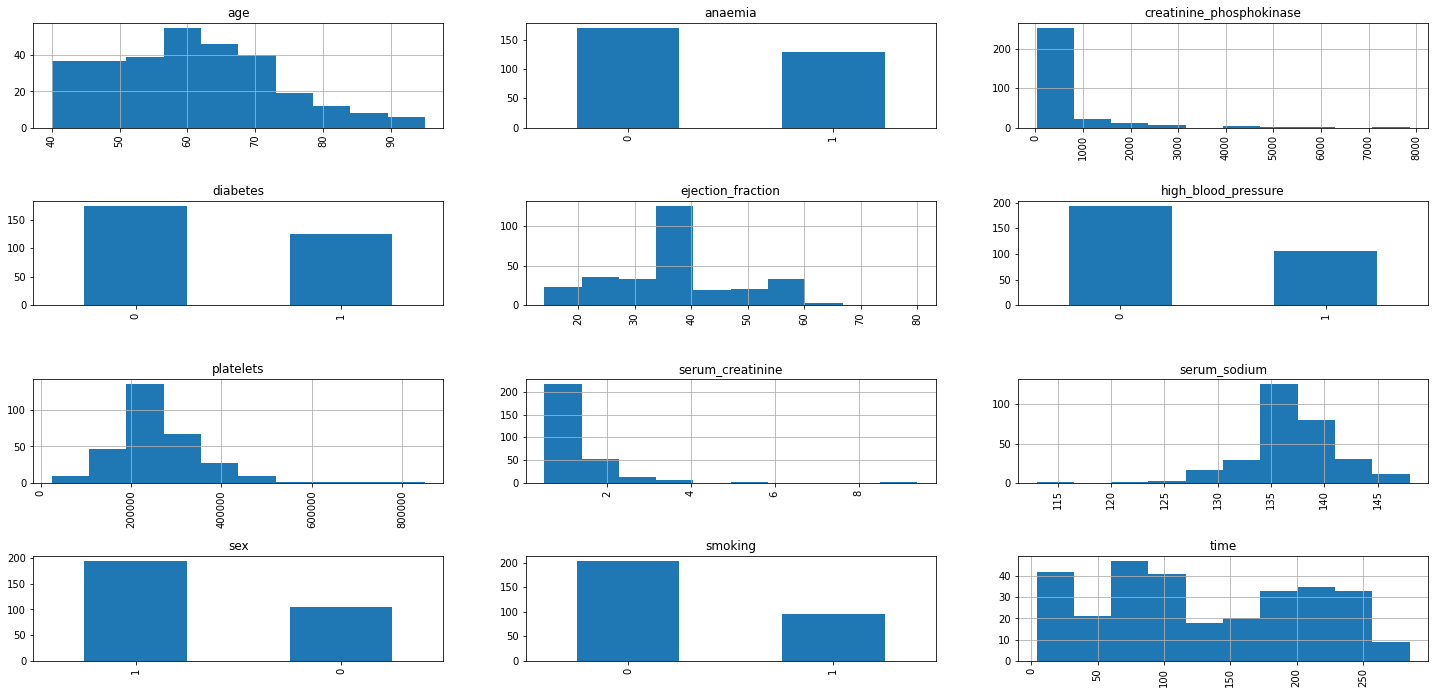

In [48]:
fig = plt.figure(figsize=(25, 15))
cols = 3
rows = np.ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns[:-1]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if column in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']: #categorical features
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Methodology

Actually, the pipeline for this problem is pretty obvious:
1. Try some model X1 (with hyperparameter tuning)
2. Try Random model X2 (with hyperparameter tuning)
3. Try Gradient model X3 (with hyperparameter tuning)

Choose the best

This is too easy, so I want to try out some new thing - AutoML. I think it's a great choice for this dataset because it is really a routine to reproduce all the pipeline for this not-so-hard dataset

Alternatively, we will just try some SOTA model and compare what is better

# Experiment setup and results; error analysis.

## AutoML

There are lots of AutoML libraries in Python and I want to choose H20 because I think it's most stable and less sklearn-dependent library

In [26]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

In [29]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.5 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=9d3fd37c3d67a8919363807a4636989ad134a0e5a08f0f3356f0f1ad61ed3afc
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


Importing h2o and its initializing

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Just several lines of code to train a model

We will train the autoML on the whole data because we actually want to find the best approach. Inside the architecture we actually use cross-validation.

In the output we can see the whole info about best model

In [40]:
aml = H2OAutoML(max_models=20, seed=1)
hf = h2o.H2OFrame(df)
hf["DEATH_EVENT"] = hf["DEATH_EVENT"].asfactor()
aml.train(x=list(X.columns), y='DEATH_EVENT', training_frame=hf) #Training whole dataset

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20221220_181335_model_1


Model Summary: 
    number_of_trees
--  -----------------
    37

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.07463286063940308
RMSE: 0.2731901547263427
LogLoss: 0.2542629539529671
Mean Per-Class Error: 0.1019088669950739
AUC: 0.9608990147783252
AUCPR: 0.9178205979232399
Gini: 0.9217980295566504

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3813236653804779
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      187  16   0.0788   (16.0/203.0)
1      12   84   0.125    (12.0/96.0)
Total  199  100  0.0936   (28.0/299.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.381324     0.857143  99
max f2                       0.230926     0.899209  121
max f0point5                 0.57851      0.877404  79
max accuracy                 0.455504     0.906355  93
max precision                0.984595     1         0
max recall                   0.0786617    1         177
max specificity              0.984595     1         0
max absolute_mcc             0.381324     0.787897  99
max min_per_class_accuracy   0.320215     0.895833  106
max mean_per_class_accuracy  0.27481      0.899502  114
max tns                      0.984595     203       0
max fns                      0.984595     95        0
max fps                      0.00722968   203       298
max tps                      0.0786617    96        177
max tnr                      0.984595     1         0
max fnr                      0.984595     0.989583  0
max fpr                      0.00722968   1         298
max tpr                      0.0786617    1         177

Gains/Lift Table: Avg response rate: 32.11 %, avg score: 31.60 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100334                   0.980694           3.11458   3.11458            1                0.98244    1                           0.98244             0.03125         0.03125                    211.458   211.458            0.03125
2        0.0200669                   0.965741           3.11458   3.11458            1                0.974126   1                           0.978283            0.03125         0.0625                     211.458   211.458            0.0625
3        0.0301003                   0.950118           3.11458   3.11458            1                0.959604   1                           0.972057            0.03125         0.09375                    211.458   211.458            0.09375
4        0.0401338                   0.943787           3.11458   3.11458            1                0.946069   1                           0.96556             0.03125         0.125                      211.458   211.458            0.125
5        0.0501672                   0.932405           3.11458   3.11458            1                0.938274   1                           0.960103            0.03125         0.15625                    211.458   211.458            0.15625
6        0.100334                    0.902257           2.90694   3.01076            0.933333         0.916837   0.966667                    0.93847             0.145833        0.302083                   190.694   201.076            0.297157
7        0.150502                    0.830541           2.69931   2.90694            0.866667         0.858617   0

Let's see all the models which were used here

FYI: `auc` column represent the values of `ROC-AUC` metric

In [42]:
h2o.automl.get_leaderboard(aml, extra_columns = "ALL")

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20221220_181335_model_1,0.921593,0.335373,0.843676,0.149554,0.32361,0.104724,165,0.085804,XGBoost
GBM_2_AutoML_2_20221220_181335,0.91913,0.335801,0.861002,0.144063,0.324486,0.105291,210,0.059883,GBM
GBM_4_AutoML_2_20221220_181335,0.918668,0.339034,0.846291,0.137444,0.327095,0.106991,198,0.057455,GBM
XGBoost_3_AutoML_2_20221220_181335,0.918565,0.343217,0.824102,0.161946,0.324821,0.105509,158,0.024987,XGBoost
XGBoost_grid_1_AutoML_2_20221220_181335_model_3,0.917282,0.344836,0.822854,0.148142,0.327929,0.107537,146,0.019456,XGBoost
XGBoost_grid_1_AutoML_2_20221220_181335_model_2,0.917282,0.34524,0.840769,0.174826,0.329493,0.108565,158,0.031155,XGBoost
GBM_3_AutoML_2_20221220_181335,0.916205,0.340731,0.844989,0.152863,0.327426,0.107208,196,0.033331,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20221220_181335,0.914819,0.34627,0.831237,0.151452,0.329136,0.108331,2805,0.109918,StackedEnsemble
GBM_grid_1_AutoML_2_20221220_181335_model_1,0.911125,0.356257,0.842185,0.170669,0.337606,0.113978,159,0.060854,GBM
StackedEnsemble_AllModels_1_AutoML_2_20221220_181335,0.911022,0.347486,0.834519,0.15117,0.329543,0.108598,5322,0.3294,StackedEnsemble


## State-Of-The-Art model (CatBoost)

In [46]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


Simple pipeline for CatBoost

In [86]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

clf = CatBoostClassifier(verbose=False, cat_features=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])
skf = StratifiedKFold(4, shuffle=True, random_state=42)
scores = cross_validate(clf, X, y, cv=skf, scoring='roc_auc', return_estimator=True)

ROC-AUC of the model (cross-validation)

In [87]:
scores['test_score'].mean()

0.9136928104575164

Mean feature importance of models from cross-validation

In [95]:
mean_feature_importance = np.mean([scores['estimator'][i].get_feature_importance() for i in range(len(scores))], axis=0)
d = {X.columns[i]: mean_feature_importance[i] for i in range(len(X.columns))}
d

{'age': 8.46748792920677,
 'anaemia': 1.9613822805843186,
 'creatinine_phosphokinase': 8.616998103111532,
 'diabetes': 1.841483883953943,
 'ejection_fraction': 14.169530073055489,
 'high_blood_pressure': 1.7098157906060363,
 'platelets': 7.7926289454769435,
 'serum_creatinine': 12.498249717686127,
 'serum_sodium': 7.359383356241423,
 'sex': 2.4443536339008247,
 'smoking': 1.8355887471853154,
 'time': 31.30309753899127}

# Discussion (comparison, interpretations, etc.)

At this point we have the results for both AutoML approach and Catboost

We can see that AutoML slightly outperform Catboost (AutoML: 0.922, CatBoost: 0.914). But the difference is small. However, it was much longer to train full AutoML pipeline compared to CatBoost. So in this situation we have a tradeoff between speed and quality

Both approaches showed similar feature importance
The top 3 important variables are:
* Time
* Ejection fraction
* Serum creatinine



# Conclusion

Let's summaries what we've done so far:

1. Briefly explained the problem and converted it to binary classification
2. Performed EDA that helped us choosing the best metric and determine which features are categorical
3. Motivated approaches. We used AutoML pipeline (H2O implementation) and SOTA model (CatBoost)
4. Trained and cross-validated both pipelines and got feature importance
5. Compared the results